In [4]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import json
from pandas.io.json import json_normalize

In [5]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

visitsItems = pd.read_sql('SELECT * FROM VisitsItems', con=db_connection)
visitsItems['created'] = pd.to_datetime(visitsItems['created'], unit='s')
visitsItems['lastmodified'] = pd.to_datetime(visitsItems['lastmodified'], unit='s')
visitsItems['deleted'].replace(0, np.nan, inplace=True)
visitsItems['deleted'] = pd.to_datetime(visitsItems['deleted'], unit='s')
# visitsItems['status_id'].replace(0, np.nan, inplace=True)
visitsItems['processed'].replace(0, np.nan, inplace=True)
visitsItems['title'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
visitsItems['description'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
visitsItems['title'] = visitsItems['title'].astype('category')
visitsItems['description'] = visitsItems['description'].astype('category')

visits = pd.read_sql('SELECT * FROM Visits', con=db_connection)
visits['created'] = pd.to_datetime(visits['created'], unit='s')
visits['lastmodified'] = pd.to_datetime(visits['lastmodified'], unit='s')
visits['registered'] = visits['registered'].replace(0, np.nan)
visits['registered'] = pd.to_datetime(visits['registered'], unit='s')
visits['deleted'] = visits['deleted'].replace(0, np.nan)
visits['deleted'] = pd.to_datetime(visits['deleted'], unit='s')
visits['paired'] = visits['paired'].replace(0, np.nan)
visits['paired'] = pd.to_datetime(visits['paired'], unit='s')
visits['created_ip'].replace(0, np.nan, inplace=True)
visits['registered_ip'].replace(0, np.nan, inplace=True)
visits['paired_ip'].replace(0, np.nan, inplace=True)
# visits['processed'].replace(0, np.nan, inplace=True)
visits['exported'].replace(0, np.nan, inplace=True)
visits['title'].fillna(value=np.nan, inplace=True)
visits['note'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)

In [3]:
visits
ticket_parse = visits['ticket']

def parse(string):
    if string is None:
        return {}
    else:
        try:
            return json.loads(string)
        except ValueError:
            print(string)
            return {}
        
    
json_str = ticket_parse.map(parse)
visits['ticket_id'] = json_str.map(lambda row: row.get('ticket_id'))

In [4]:
visitsItems_clean = visitsItems.drop(['refers_to_id', 'deleted','status_id', 'processed', 'input_id'], axis=1)

In [5]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option("max_colwidth", 500)

In [6]:
visitsItems

,id,user_id,action_id,tool_id,bundle_id,refers_to_id,refers_to_uid,title,description,created,lastmodified,deleted,status_id,processed,input_id
0,793451,0,1,0,793449,1,18356743,own Charles Dawes name well aftermath,different James Monroe feel just carpenter,2014-10-23 16:25:55,2014-10-23 16:25:55,NaT,0,NaN,0
1,793453,0,2,9,793449,1,18146475,great John C. Breckinridge have very achieve,other Walter Mondale talk when picture,2014-10-23 16:26:15,2014-10-23 16:26:15,NaT,0,NaN,0
2,793455,0,2,6,793449,1,18311851,first John C. Calhoun think only fuel,old Al Gore walk too year,2014-10-23 16:26:55,2014-10-23 16:26:55,NaT,0,NaN,0
3,793459,3,2,7,793449,1,18476565,early Henry A. Wallace call out wrist,good John F. Kennedy tell also government,2014-10-23 16:27:59,2014-10-23 16:27:59,NaT,0,NaN,0
4,793495,3,2,7,793449,1,18628929,same Hubert Humphrey kick very health,next Joe Biden come when creature,2014-10-23 19:36:56,2014-10-23 19:36:56,NaT,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479553,132873405,0,2,12,132777661,0,1595449503,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:25:03,2020-07-22 20:25:03,NaT,0,NaN,3
18479554,132873409,28814,2,12,132777661,0,1595449610,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:26:50,2020-07-22 20:26:50,NaT,0,NaN,3
18479555,132873413,28814,2,12,132777661,0,1595449666,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:27:46,2020-07-22 20:27:46,NaT,0,NaN,3
18479556,132873417,28814,2,3,132777661,0,1595450275,My Wallpaper,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:37:55,2020-07-22 20:37:55,NaT,0,NaN,3


In [7]:
visits_clean = visits.drop(['expires', 'paired', 'deleted', 'created_ip', 'registered_ip', 'paired_ip', 'processed', 
             'purchased_by_user_id', 'note', 'exported', 'first_accessed', 'ignore_first_accessed', 'title'], axis=1)

# User_id == 0

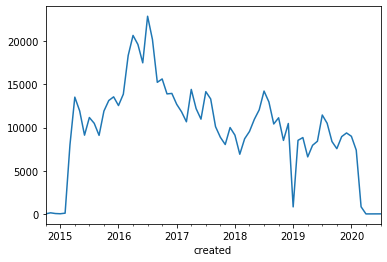

In [8]:
visits_zero = visits[visits['user_id'] == 0]
visits_zero_by_month = visits_zero['created'].groupby(visits_zero.created.dt.to_period("M")).agg('count')
visits_zero_by_month.plot()

Text(0, 0.5, 'account open')

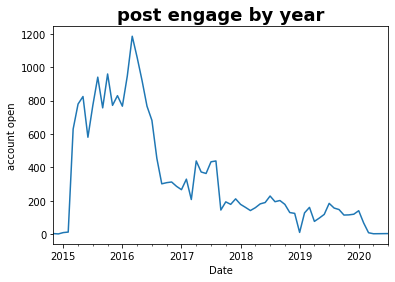

In [20]:
visits_nozero = visits[visits['user_id'] != 0]
visits_nozero_by_month = visits_nozero['created'].groupby(visits_nozero.created.dt.to_period("M")).agg('count')
visits_nozero_by_month.plot()

plt.title('post engage by year', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.xlabel('Date')
plt.ylabel('account open')
# plt.savefig('post_engage_year.png', dpi=300)

In [112]:
visits_zero.nunique()
#693,161 visits for user 0

#add some information about that - the the data is kind of corrupted. also check user 0 in checkout and activity. 

id                       693161
shortcode                693161
user_id                       1
created                  686026
lastmodified             563065
registered               523903
expires                       1
paired                       12
ticket                   693127
deleted                      11
created_ip                   25
registered_ip                23
paired_ip                     1
processed                     4
purchased_by_user_id          1
note                          2
exported                      0
first_accessed           109036
ignore_first_accessed         1
title                         0
ticket_id                693032
dtype: int64

In [9]:
visitsItems_zero = visitsItems[visitsItems['user_id'] != 0]
visitsItems_zero['refers_to_uid'].count()

97273

In [10]:
#cleaning user id 0 - in order to merge i need to clean it.
visits_clean = visits_clean[visits_clean['user_id'] !=0]
visitsItems_clean = visitsItems_clean[visitsItems_clean['user_id'] !=0]

In [11]:
visits_merge = pd.merge(visits_clean, visitsItems_clean, on='user_id', suffixes=('_visits', '_visitsItems'))
visits_merge

,id_visits,shortcode,user_id,created_visits,lastmodified_visits,registered,ticket,ticket_id,id_visitsItems,action_id,tool_id,bundle_id,refers_to_uid,title,description,created_visitsItems,lastmodified_visitsItems
0,796435,2014113u247,247,2014-11-03 21:13:10,2016-02-23 22:57:38,2014-11-03 21:13:10,"{""tessitura_spoofing"":1,""ticket_id"":""796435"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-11-03T16:13:10-05:00""}",796435,796499,2,0,796435,1416269944,the king!,uploaded from OpenFrameworks,2014-11-03 21:34:49,2014-11-03 21:34:49
1,796435,2014113u247,247,2014-11-03 21:13:10,2016-02-23 22:57:38,2014-11-03 21:13:10,"{""tessitura_spoofing"":1,""ticket_id"":""796435"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-11-03T16:13:10-05:00""}",796435,1049639,1,0,798159,18633237,NaN,NaN,2014-11-18 17:33:40,2014-11-18 17:33:41
2,796435,2014113u247,247,2014-11-03 21:13:10,2016-02-23 22:57:38,2014-11-03 21:13:10,"{""tessitura_spoofing"":1,""ticket_id"":""796435"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-11-03T16:13:10-05:00""}",796435,1049913,1,0,798159,18443563,NaN,NaN,2014-11-19 00:17:27,2014-11-19 00:17:27
3,796435,2014113u247,247,2014-11-03 21:13:10,2016-02-23 22:57:38,2014-11-03 21:13:10,"{""tessitura_spoofing"":1,""ticket_id"":""796435"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-11-03T16:13:10-05:00""}",796435,1051457,1,0,798159,18635437,NaN,NaN,2014-11-21 15:21:06,2014-11-21 15:21:06
4,796435,2014113u247,247,2014-11-03 21:13:10,2016-02-23 22:57:38,2014-11-03 21:13:10,"{""tessitura_spoofing"":1,""ticket_id"":""796435"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-11-03T16:13:10-05:00""}",796435,1100035,1,0,798159,18170501,NaN,NaN,2014-11-25 21:54:30,2014-11-25 21:54:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354520,132794701,gz65,28814,2020-07-06 17:41:57,2020-07-22 20:00:53,2020-07-06 17:42:08,"{""status"":""Attendance recorded for ticket: 940559"",""ticket_id"":""940559"",""shortcode"":""gz65"",""performance_id"":""4251"",""performance_date"":""2020-07-06T10:00:00-04:00"",""date_attended"":""Jul 6 2020 1:42PM"",""attended"":""1"",""type"":null}",940559,132873397,2,11,132794701,1595448288,My Hat,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:04:48,2020-07-22 20:04:48
354521,132794701,gz65,28814,2020-07-06 17:41:57,2020-07-22 20:00:53,2020-07-06 17:42:08,"{""status"":""Attendance recorded for ticket: 940559"",""ticket_id"":""940559"",""shortcode"":""gz65"",""performance_id"":""4251"",""performance_date"":""2020-07-06T10:00:00-04:00"",""date_attended"":""Jul 6 2020 1:42PM"",""attended"":""1"",""type"":null}",940559,132873409,2,12,132777661,1595449610,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:26:50,2020-07-22 20:26:50
354522,132794701,gz65,28814,2020-07-06 17:41:57,2020-07-22 20:00:53,2020-07-06 17:42:08,"{""status"":""Attendance recorded for ticket: 940559"",""ticket_id"":""940559"",""shortcode"":""gz65"",""performance_id"":""4251"",""performance_date"":""2020-07-06T10:00:00-04:00"",""date_attended"":""Jul 6 2020 1:42PM"",""attended"":""1"",""type"":null}",940559,132873413,2,12,132777661,1595449666,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:27:46,2020-07-22 20:27:46
354523,132794701,gz65,28814,2020-07-06 17:41:57,2020-07-22 20:00:53,2020-07-06 17:42:08,"{""status"":""Attendance recorded for ticket: 940559"",""ticket_id"":""940559"",""shortcode"":""gz65"",""performance_id"":""4251"",""performance_date"":""2020-07-06T10:00:00-04:00"",""date_attended"":""Jul 6 2020 1:42PM"",""attended"":""1"",""type"":null}",940559,132873417,2,3,132777661,1595450275,My Wallpaper,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:37:55,2020-07-22 20:37:55


In [12]:
visits_merge = visits_merge[['id_visits','user_id', 'shortcode', 'bundle_id', 'action_id', 'tool_id', 'refers_to_uid', 'created_visits',
             'lastmodified_visits', 'created_visitsItems']]
visits_merge
# visits_merge.to_csv('df_of_visitItems_and_visits.csv', encoding='utf-8', index=False)

,id_visits,user_id,shortcode,bundle_id,action_id,tool_id,refers_to_uid,created_visits,lastmodified_visits,created_visitsItems
0,796435,247,2014113u247,796435,2,0,1416269944,2014-11-03 21:13:10,2016-02-23 22:57:38,2014-11-03 21:34:49
1,796435,247,2014113u247,798159,1,0,18633237,2014-11-03 21:13:10,2016-02-23 22:57:38,2014-11-18 17:33:40
2,796435,247,2014113u247,798159,1,0,18443563,2014-11-03 21:13:10,2016-02-23 22:57:38,2014-11-19 00:17:27
3,796435,247,2014113u247,798159,1,0,18635437,2014-11-03 21:13:10,2016-02-23 22:57:38,2014-11-21 15:21:06
4,796435,247,2014113u247,798159,1,0,18170501,2014-11-03 21:13:10,2016-02-23 22:57:38,2014-11-25 21:54:30
...,...,...,...,...,...,...,...,...,...,...
354520,132794701,28814,gz65,132794701,2,11,1595448288,2020-07-06 17:41:57,2020-07-22 20:00:53,2020-07-22 20:04:48
354521,132794701,28814,gz65,132777661,2,12,1595449610,2020-07-06 17:41:57,2020-07-22 20:00:53,2020-07-22 20:26:50
354522,132794701,28814,gz65,132777661,2,12,1595449666,2020-07-06 17:41:57,2020-07-22 20:00:53,2020-07-22 20:27:46
354523,132794701,28814,gz65,132777661,2,3,1595450275,2020-07-06 17:41:57,2020-07-22 20:00:53,2020-07-22 20:37:55


In [13]:
visits_merge.nunique()
#i'm losing information cause i'm not looking into all the items that id 0 collected
#and then i'm losing that information from other users

id_visits               1854
user_id                 1467
shortcode               1854
bundle_id               1563
action_id                  2
tool_id                   17
refers_to_uid          17058
created_visits          1854
lastmodified_visits     1616
created_visitsItems    54020
dtype: int64

# how many visits created

In [ ]:
#reading csv that i ran in sql that does this:
#takes all the visititeams action2 and mask it in visits to get the number of visits
#visitsItems_second = visitsItems[visitsItems['action_id'] ==2]
#vistits[visitsItems_second['user_id']]

In [ ]:
#can't solve how to query the number of visits that assoiciated with 'created' / 
#action_id ==2 , either becuase of user ==0 or becuase of missing shared columns. 
#what does it will give me and does it important? 